In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


np.set_printoptions(precision=2)


Scikit-learn has a gradient descent regression model sklearn.linear_model.SGDRegressor. 
 
sklearn.preprocessing.StandardScaler perform z-score normalization. it is referred to as 'standard score'.

In [28]:
# loading house data from a .csv file 
def load_house_data():
    data = np.loadtxt("./data/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [88]:
X_train, y_train = load_house_data()

# labels for the features
X_features = ['size(sqft)','bedrooms','floors','age']

## scaling/normalizing data

In [102]:
# declaring a standard scalar object
scaler = StandardScaler()

# scaling data in X_train and  storing it in X_norm 
X_norm = scaler.fit_transform(X_train)

# print(X_train)
# print(X_norm)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### Create and fit the regression model

In [54]:
#creating the regression model
sgdr = SGDRegressor(max_iter=1000)

# fit x,y values to the regression model
sgdr.fit(X_norm, y_train)

print(sgdr)

print(f"number of iterations completed: {sgdr.n_iter_}\n, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 126
number of weight updates: 12475.0


## finding parameters W & b


In [66]:
#(Bias) 
b_norm = sgdr.intercept_

# coefficinets (weights) (W)
w_norm = sgdr.coef_

print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [110.19 -21.05 -32.43 -38.04], b:[363.15]


## Predictions

In [100]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
print(y_pred_sgd, "\n")

# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(y_pred, "\n")
print(f"prediction using np.dot() and sgdr.predict equal: {(y_pred == y_pred_sgd).all()}\n")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"\nTarget values \n{y_train[:4]}")

[295.14 485.99 389.67 492.15 419.94 222.74 522.97 267.76 684.24 181.74
 318.3  479.09 409.85 393.3  286.73 323.05 406.19 436.59 270.03 500.09
 328.45 388.19 550.35 241.33 295.62 282.36 217.4  490.85 228.53 341.69
 291.43 490.15 238.48 598.4  383.52 452.92 401.27 406.21 172.42 423.71
 434.61 277.27 228.53 448.41 489.07 332.1  465.55 221.7  386.69 456.45
 370.25 468.39 310.38 426.67 391.56 347.97 339.21 471.29 243.48 298.36
 272.92 249.73 298.07 334.76 376.19 288.85 228.53 620.87 352.57 510.99
 364.46 363.52 298.07 407.17 288.61 386.28 488.25 261.04 258.65 427.29
 238.29 356.02 340.06 390.09 381.99 220.36 434.61 243.47 465.55 185.76
 341.68 409.86 445.47 232.13 332.1  408.74 406.21 351.49 274.01] 

[295.14 485.99 389.67 492.15 419.94 222.74 522.97 267.76 684.24 181.74
 318.3  479.09 409.85 393.3  286.73 323.05 406.19 436.59 270.03 500.09
 328.45 388.19 550.35 241.33 295.62 282.36 217.4  490.85 228.53 341.69
 291.43 490.15 238.48 598.4  383.52 452.92 401.27 406.21 172.42 423.71
 434.61 27

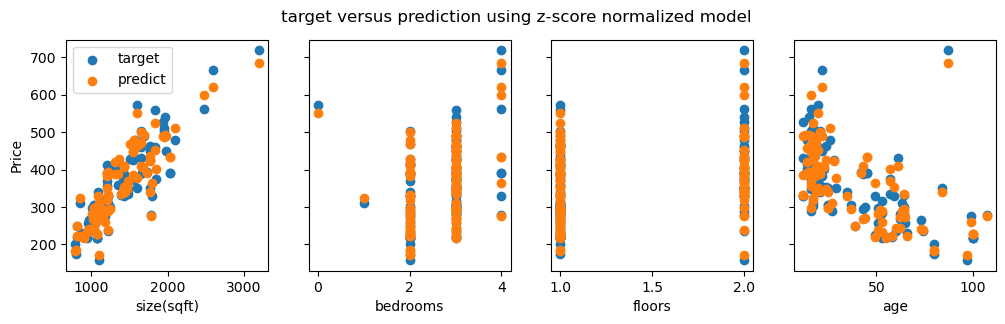

In [110]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()